In [1]:
import os
import pandas as pd; pd.set_option('max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler as mms, LabelEncoder as le
from IPython.display import clear_output as co

# from Classification import Classifier, plot_lc_model_comparison
# from NeuralNetwork import execute_neural_net, plot_learning_curve_comparison

---
# 2. DATA PREPARATION

#### Loading Clean Datasets

In [2]:
quest = pd.read_csv('data/clean/questionnaire.csv')
grades = pd.read_csv('data/clean/grades.csv')

#### Merging datasets 

In [3]:
std_data = pd.merge(quest, grades, on=['ID_ALUNO'], how='left')

#### 2.1 Choose grade to extract (5th, 9th or 12th)

In [4]:
grade = 5
data = std_data[std_data['ID_SERIE']==grade].copy()

---
# DATA TRANSFORMATION

In [6]:
ids = data.columns[:12].tolist()
questions = data.columns[12:70].tolist()
grades = data.columns[70:].tolist()

data.dtypes.value_counts()

object     58
int64      11
float64     6
dtype: int64

#### 2.6 Label Encoding Categorical Features

In [11]:
for col in ids + questions:
    data[col] = le().fit_transform(data[col])

#### 2.5 Scaling Grade Columns

In [12]:
data[grades] = mms().fit_transform(data[grades]) # Excluding grade column 'PESO'

#### Log Transforming skewed columns

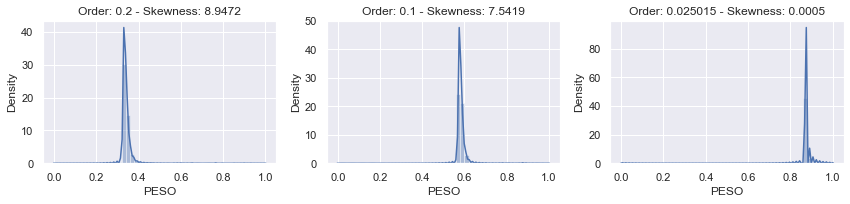

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), tight_layout=True)
for i, order in enumerate([0.2, 0.1, 0.025015]):
    values = data['PESO']**order
#     sns.distplot(mms().fit_transform(values.values.reshape(-1, 1)), ax=ax[i])
    sns.distplot(values, ax=ax[i])
    ax[i].set(title=f'Order: {round(order, 6)} - Skewness: {round(values.skew(), 4)}', ylabel='Density')
plt.show()

In [14]:
data['PESO'] = data['PESO']**0.025015

#### Drop constant columns

#### Identify constant columns

In [16]:
const_cols = [col for col in ids+questions if len(data[col].unique()) < 2]
print(f'Constant columns dropped: {const_cols}')
data.drop(const_cols, 1, inplace=True)

Constant columns: ['ID_SERIE', 'TX_RESP_Q055', 'TX_RESP_Q056', 'TX_RESP_Q057', 'TX_RESP_Q058']


## 2.8 Saving Transformed Data

In [17]:
try: os.mkdir('data/grades')
except: None
data.to_csv('data/grades/5th_grade.csv', index=True); print(f'Saved at: {datetime.now()}')

Saved at: 2022-05-27 13:30:40.220741
